Proposal: Determining Weather a State is Vulneralbe to Collapse Using Data Analysis

Intro:
Conflict assessment framework, or “CAST”, is used alongside The Fragile States Index to assess a states vulnerability to collapse. It uses 12 different predictors to determine if states are at risk for collapse. It considers cohesion, economic, political, and social indicators. For cohesion they look at: security threats(Security Apparatus), fragmentation of state in relation to class, ethnicity, race, religion, etc.(Factionalized Elites), division of groups in the society primarily based on politics and social hierarchy (Group Grievance). For Economic factors they look at: economic decline within a country and how that affects its citizens (Economic decline and poverty), inequality within the economy(unequal economic development), the impact of human displacement on a country’s development (Human flight and brain drain). For political indicators they look at: the relationship between a government and its citizens (state legitimacy),  services provided by the government that are essential for example healthcare and education (Public services), whether or not basic human rights and freedoms are protected (human rights and rule of law). For social factors: pressures imposed by society or the environment for example availability of food and water (demographic pressures), the pressures placed on states when their citizens are forced to seek refuge during social or political unrest (Refugees and IDPs),  out of country assistance for a government in regards to funding and military aid (External intervention). Our question is can we predict if a country is at high or low risk of collapse based on selected variables. 


Methods: 
During our project, we seek to predict if a country is vulnerable to economic collapse. In order to pursue this, we are using the classification method for determining our outcome. We will use the K-nearest neighbors algorithm to run this binary classification, and use the following predictor variables; C1 (Security Apparatus), E3 (Human Flight and Brain Drain), P2 (Public Services), and S2 (Refugees and IDPs). In order to determine the most accurate data possible, we are using predictor variables from four different categories; cohesion, economic, political, and social. This ensures that our analysis comprehensively assesses the multifaceted aspects contributing to a country's vulnerability to economic collapse. Through KNN, we will create a training set that enables our function to understand past observations, and predict a class in the future. 

One way we can visualize our data is by creating a confusion matrix, in order to evaluate how well the model is able to classify countries into vulnerable or non-vulnerable to economic collapse based on the selected predictor variables. By examining the values in the confusion matrix, we can gain insights into the strengths and weaknesses of our model, and adjust the analysis as needed to answer future questions.


Preliminary Exploratory Data Analysis:

In [59]:
library(tidyverse)
library(repr)
library(tidymodels)

Reading in Our Dataset

In [60]:
data <- read_csv("vulnerability_data.csv")


Rows: 179 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Country, Rank
dbl (14): Year, Total, S1: Demographic Pressures, S2: Refugees and IDPs, C3:...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [61]:
colnames(data)[5] = "demographic_pressures"
colnames(data)[6] = "refugees"
colnames(data)[7] = "group_grievence"
colnames(data)[8] = "human_flight"
colnames(data)[9] = "economic_inequality"
colnames(data)[10] = "economic_decline"
colnames(data)[11] = "state_legitimacy"
colnames(data)[12] = "public_service"
colnames(data)[13] = "human_rights"
colnames(data)[14] = "security_apparatus"
colnames(data)[15] = "fractionalized elites"
colnames(data)[16] = "external_intervention"
data

Country,Year,Rank,Total,demographic_pressures,refugees,group_grievence,human_flight,economic_inequality,economic_decline,state_legitimacy,public_service,human_rights,security_apparatus,fractionalized elites,external_intervention
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Somalia,2023,1st,111.9,10.0,9.0,8.7,8.6,9.1,9.5,9.6,9.8,9.0,9.5,10.0,9.1
Yemen,2023,2nd,108.9,9.6,9.6,8.8,6.4,7.9,9.9,9.8,9.6,9.6,8.6,9.9,9.2
South Sudan,2023,3rd,108.5,9.7,10.0,8.6,6.5,8.6,8.6,9.8,9.7,8.7,9.9,9.2,9.2
Congo Democratic Republic,2023,4th,107.2,9.7,9.8,9.4,6.4,8.4,8.1,9.3,9.3,9.3,8.8,9.6,9.1
Syria,2023,5th,107.1,7.4,9.1,9.1,8.0,6.5,9.6,10.0,9.0,9.1,9.4,9.9,10.0
Afghanistan,2023,6th,106.6,9.2,8.6,8.3,8.5,8.2,9.6,9.4,10.0,8.7,9.7,8.7,7.7
Sudan,2023,7th,106.2,8.8,9.6,9.3,7.5,8.5,9.3,9.4,8.6,9.2,8.3,9.6,8.1
Central African Republic,2023,8th,105.7,9.3,9.5,8.1,6.2,9.6,8.2,8.9,10.0,9.1,8.0,9.4,9.4
Chad,2023,9th,104.6,9.5,9.0,8.1,7.7,8.7,8.4,9.1,9.6,8.4,8.7,9.5,7.9


In [62]:
data_filtered <- filter(data, Rank == "5th")
data_filtered

Country,Year,Rank,Total,demographic_pressures,refugees,group_grievence,human_flight,economic_inequality,economic_decline,state_legitimacy,public_service,human_rights,security_apparatus,fractionalized elites,external_intervention
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Syria,2023,5th,107.1,7.4,9.1,9.1,8,6.5,9.6,10,9,9.1,9.4,9.9,10


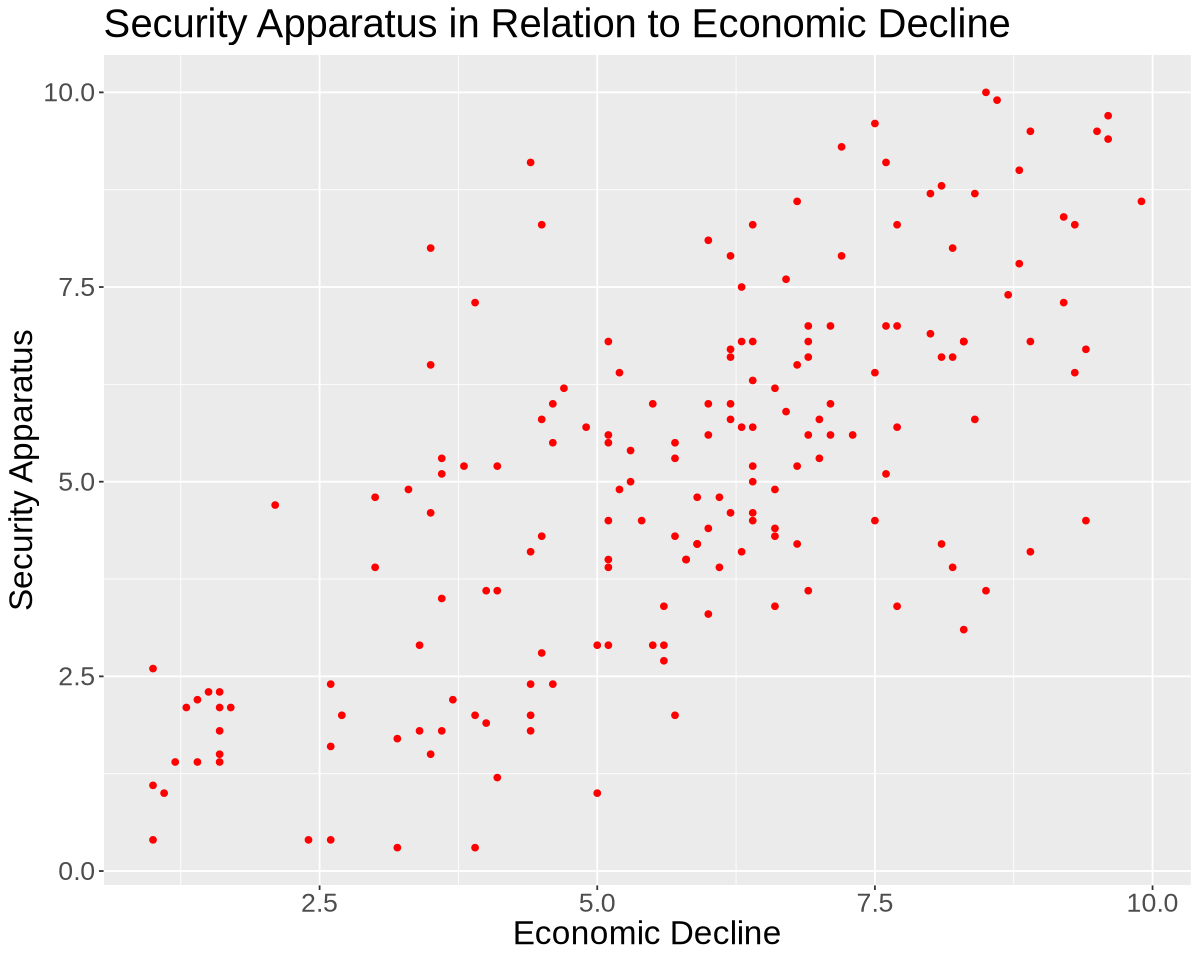

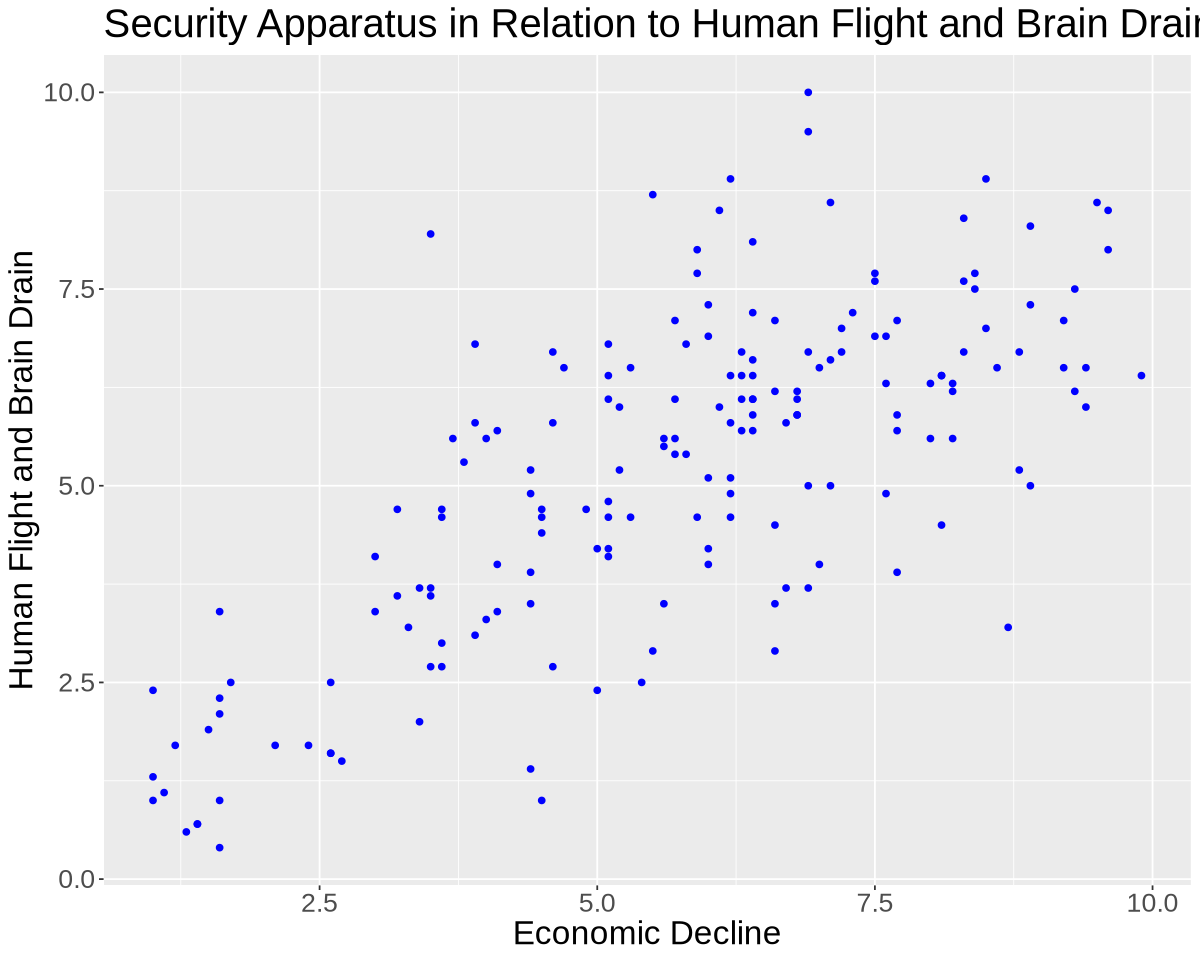

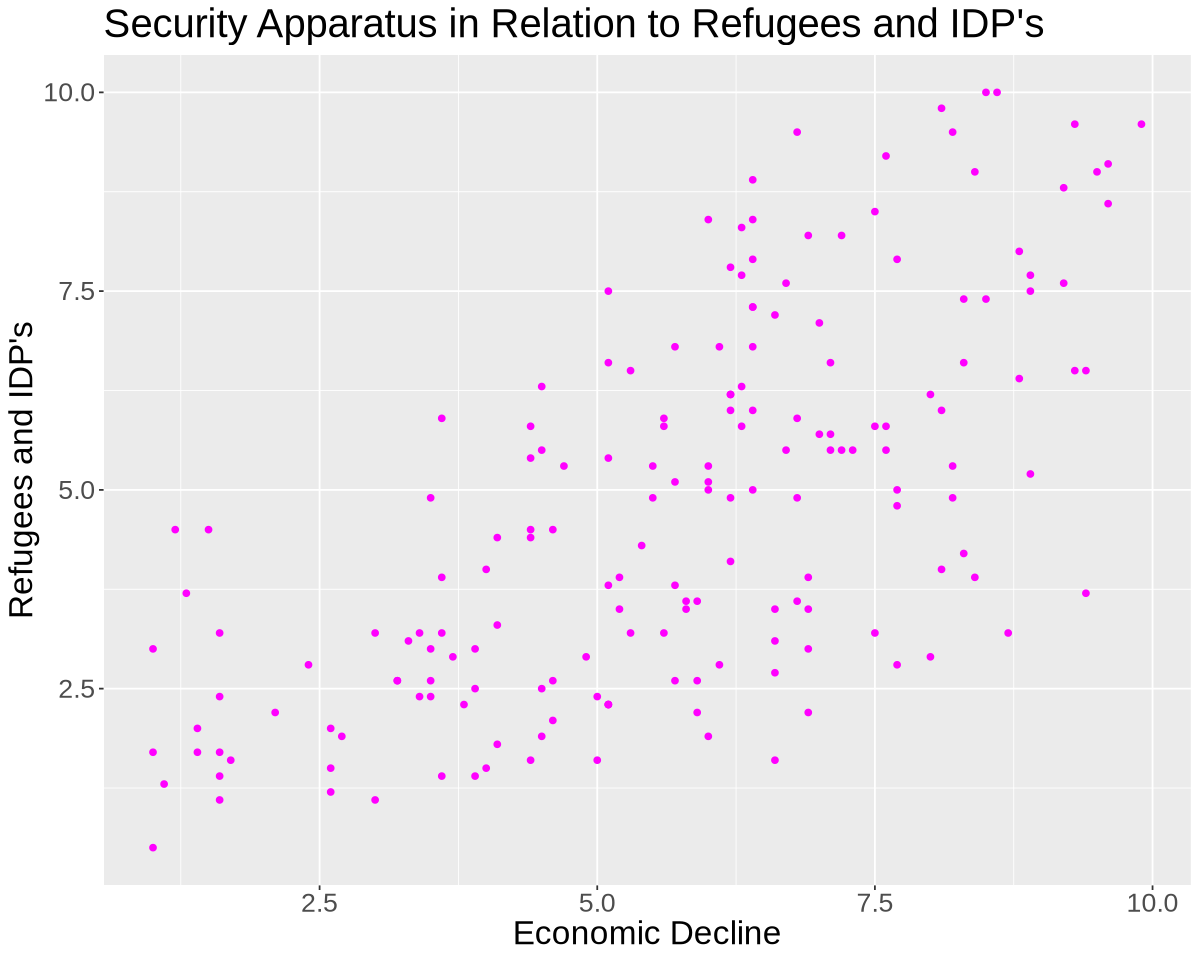

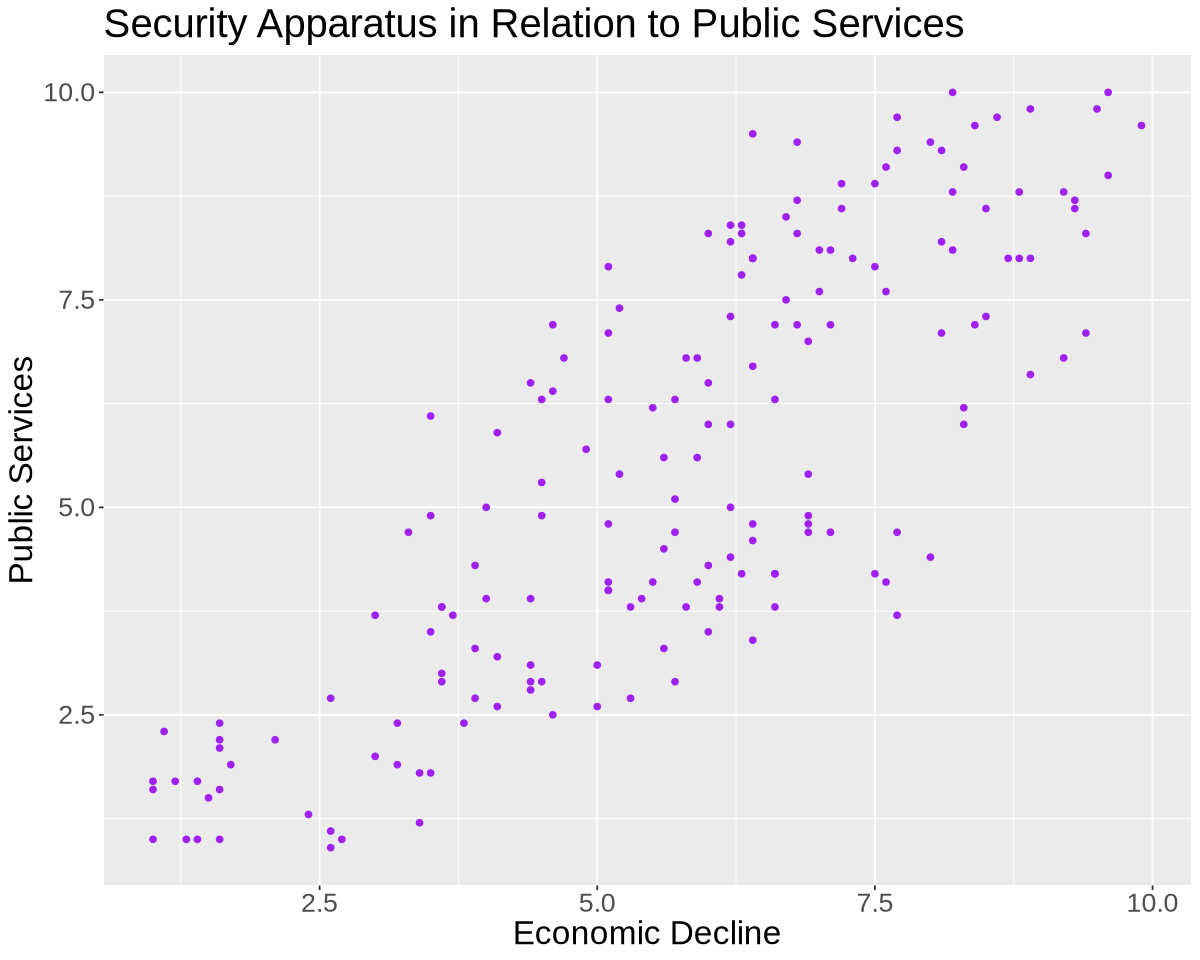

In [63]:
options(repr.plot.width = 10, repr.plot.height = 8)

plot_1 <- data |>
ggplot(aes(x = economic_decline, y = security_apparatus)) +
geom_point(color = "red") +
xlab("Economic Decline") +
ylab("Security Apparatus") +
ggtitle("Security Apparatus in Relation to Economic Decline") +
theme(text = element_text(size=20))

plot_2 <- data |>
ggplot(aes(x = economic_decline, y = human_flight)) +
geom_point(color = "blue") +
xlab("Economic Decline") +
ylab("Human Flight and Brain Drain") +
ggtitle("Security Apparatus in Relation to Human Flight and Brain Drain") +
theme(text = element_text(size=20))

plot_3 <- data |>
ggplot(aes(x = economic_decline, y = refugees)) +
geom_point(color = "magenta") +
xlab("Economic Decline") +
ylab("Refugees and IDP's") +
ggtitle("Security Apparatus in Relation to Refugees and IDP's") +
theme(text = element_text(size=20))

plot_4 <- data |>
ggplot(aes(x = economic_decline, y = public_service)) +
geom_point(color = "purple") +
xlab("Economic Decline") +
ylab("Public Services") +
ggtitle("Security Apparatus in Relation to Public Services") +
theme(text = element_text(size=20))

plot_1
plot_2
plot_3
plot_4

Expected Outcomes:
The expected outcome from our classification is answering whether a state/country is vulnerable to collapse.The findings can be used to allocate resources and assistance effectively to vulnerable states, potentially mitigating the risk of economic collapse. By identifying vulnerable countries early, preventive measures can be implemented, leading to improved stability and well-being for their citizens. Since there are multiple predictors being used, future questions that could arise from this are how each one of these factors/predictors can affect the state of a country and its vulnerability level to collapse, as well as them all together (the purpose of this project). It can also be used to help answer how the future states will be impacted by economic collapse, through analysis of these respective factors. 
